In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('data/steam_reviews.csv')
df.head(10)

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight
5,2016-12-12,4,55,2694,False,Recommended,ENGLISH After playing for more than two years ...,Dead by Daylight
6,2017-09-17,12,228,48,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
7,2018-12-24,295,219,71,False,Recommended,I have never been told to kill myself more tha...,Dead by Daylight
8,2018-09-21,2,54,400,False,Recommended,Any longtime Dead by Daylight player knows tha...,Dead by Daylight
9,2018-12-05,380,271,414,False,Recommended,if you think cs go is toxic try this game,Dead by Daylight


In [6]:
df.dtypes

date_posted               object
funny                      int64
helpful                    int64
hour_played                int64
is_early_access_review      bool
recommendation            object
review                    object
title                     object
dtype: object

In [9]:
df.isna().sum()

date_posted                  0
funny                        0
helpful                      0
hour_played                  0
is_early_access_review       0
recommendation               0
review                    1516
title                        0
dtype: int64

In [12]:
df = df.dropna(axis='rows')
df.isna().sum()

date_posted               0
funny                     0
helpful                   0
hour_played               0
is_early_access_review    0
recommendation            0
review                    0
title                     0
dtype: int64

In [14]:
df['title'].unique()

array(['Expansion - Hearts of Iron IV: Man the Guns', 'Dead by Daylight',
       'Wargroove', 'Wallpaper Engine', 'Factorio',
       'Insurgency: Sandstorm', 'Cold Waters', 'Tannenberg',
       'Pathfinder: Kingmaker', 'MONSTER HUNTER: WORLD',
       'Divinity: Original Sin 2 - Definitive Edition',
       'Football Manager 2019', "Garry's Mod", 'Survivor Pass: Vikendi',
       'Moonlighter', 'Terraria', 'GOD EATER 3',
       'Sid Meier’s Civilization® VI', 'Rocket League®',
       'Subnautica: Below Zero', "Tom Clancy's Rainbow Six® Siege",
       'ASTRONEER', 'Sid Meier’s Civilization® VI: Rise and Fall',
       'Kenshi', 'Euro Truck Simulator 2', 'Grand Theft Auto V',
       'RimWorld', 'NBA 2K19', 'RESIDENT EVIL 2 / BIOHAZARD RE:2',
       'Slay the Spire', 'My Time At Portia', 'Foundation', 'Beat Saber',
       "Sid Meier's Civilization® VI: Gathering Storm", 'Stardew Valley',
       'Farming Simulator 19', "PLAYERUNKNOWN'S BATTLEGROUNDS",
       'Overcooked! 2', "Don't Starve Toge

In [15]:
reviews_per_title = df.groupby(['title', 'recommendation'])['review'].count() \
    .reset_index() \
    .rename(columns = {'review': 'count'})
reviews_per_title

,title,recommendation,count
0,ACE COMBAT™ 7: SKIES UNKNOWN,Recommended,10
1,ARK: Survival Evolved,Not Recommended,161
2,ARK: Survival Evolved,Recommended,33
3,ASTRONEER,Not Recommended,88
4,ASTRONEER,Recommended,2570
...,...,...,...
69,Tom Clancy's Rainbow Six® Siege,Recommended,10
70,Wallpaper Engine,Recommended,169
71,Wargroove,Not Recommended,1
72,Wargroove,Recommended,9


<AxesSubplot:xlabel='count', ylabel='title'>

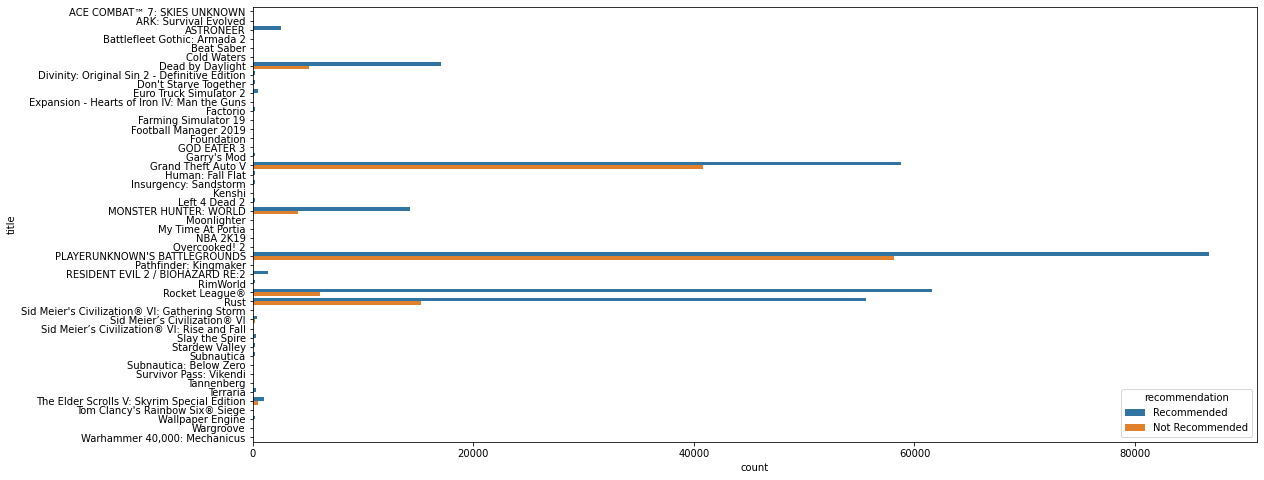

In [19]:
plt.figure(figsize=(18,8))
sns.barplot(data=reviews_per_title, y = 'title', x = 'count', hue='recommendation')